**Cloning the Developmental Repo of Elixpo with PAT**

In [ ]:
!git clone https://Circuit-Overtime:<PAT GOES HERE>@github.com/Circuit-Overtime/elixpo.ai.git

Cloning into 'elixpo.ai'...
remote: Support for password authentication was removed on August 13, 2021.
remote: Please see https://docs.github.com/get-started/getting-started-with-git/about-remote-repositories#cloning-with-https-urls for information on currently recommended modes of authentication.
fatal: Authentication failed for 'https://github.com/Circuit-Overtime/elixpo.ai.git/'


model_rem.py


# Summary of Text Classification Data Preparation

This notebook focuses on preparing a dataset for classifying text as meaningful or gibberish.

1. **Libraries Used**: The code imports necessary libraries including `pandas` for data manipulation, `sklearn` for model training and evaluation, and `matplotlib`/`seaborn` for data visualization.

2. **Dataset Loading**: The dataset is loaded from a CSV file located at `/content/elixpo.ai/dataset/combined.csv`, and any missing values are dropped to ensure clean data.

3. **Data Preprocessing**: The text data in the 'response' column is converted to lowercase for consistency, making it easier to process.

4. **Feature and Label Definition**: The dataset is split into features (`x`) and labels (`y`), where `x` contains the text responses and `y` contains the corresponding labels.

5. **Dataset Splitting**: The data is divided into training (80%), validation (10%), and test sets (10%) to evaluate the model's performance effectively.

6. **DataFrame Creation**: Separate DataFrames are created for the training, validation, and test sets, allowing for easy handling and analysis of the data.

7. **Data Visualization**: A count plot visualizes the distribution of labels across the training, validation, and test datasets, providing insights into the balance of classes.

8. **Sampling for Inspection**: Random samples from each dataset are printed, showcasing examples of the texts included in the training, validation, and test sets.

This structured approach ensures the dataset is well-prepared for subsequent modeling tasks, facilitating an effective classification process.


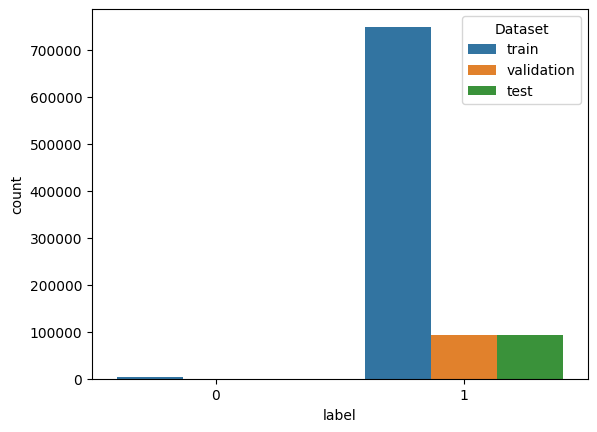

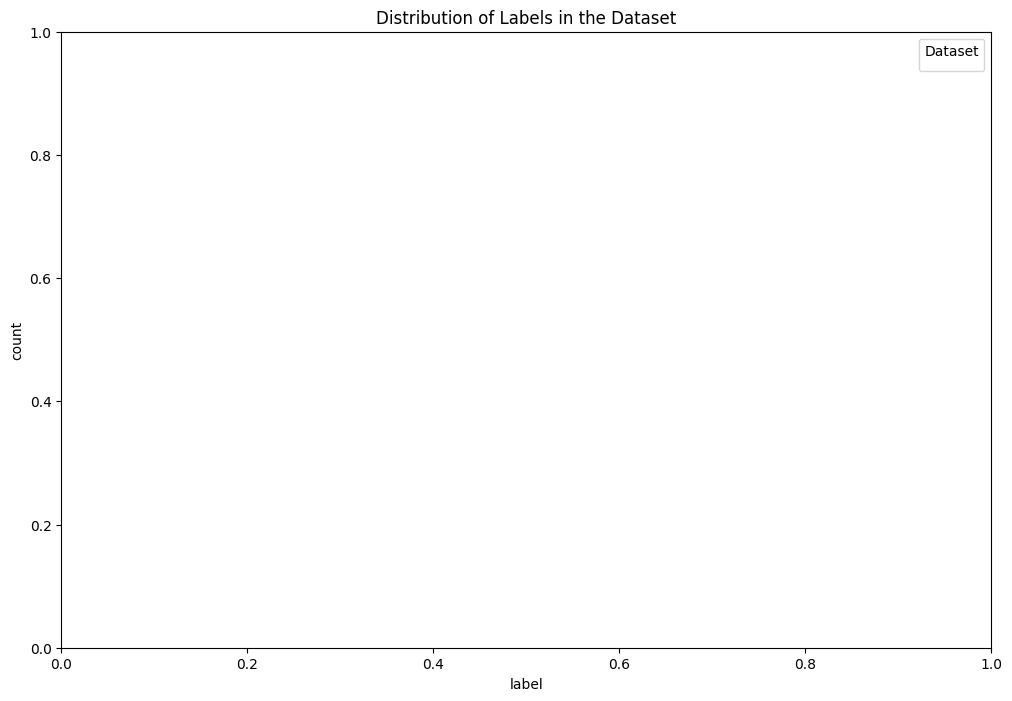

Sample Text from Training Set:
["discontinued parfum and the scent also disappered very fast: this brand is discontinued a few years ago. the smell is sort of alcoholic and not very nice that i used to use about 5 years ago. i cannot return it as amazon won't accept return for perfumes. since it is discontinued product, the scent does not last long.", 'save money and buy full workout instead: save your money. there is only one workout and a bunch of advertisements on the dvd. i subsequently bought the insanity full workout because the 20 minute workout was not really useful other then as a demo. just spend the money for the full workout which is very good. another note, it helps to have completed p90x before any of the insanity workouts.', "this is an amazing musical! definitely one of my favorites!: i am completely obssessed with this movie! i've only known of it for less than a few months, and yet i've watched it so many times i know the dance moves off by heart. it is a movie that i

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'/content/elixpo.ai/dataset/combined.csv')
df.dropna()


#converting the labels to lowercase
df['response'] = df['response'].str.lower()

x = df['response']
y = df['label']
# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Create DataFrames for each dataset
train_data = pd.DataFrame({"Text": x_train, "label": y_train, "Dataset": "train"})
val_data = pd.DataFrame({"Text": x_val, "label": y_val, "Dataset": "validation"})
test_data = pd.DataFrame({"Text": x_test, "label": y_test, "Dataset": "test"})

# Combine all datasets into one DataFrame for visualization
combined_data = pd.concat([train_data, val_data, test_data])


#heresplitting the data into training , validating and testing data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#create a dataframe object
#train_data = pd.DataFrame({"Text": x_train, "label": y_train, "Dataset": "train"})
#test_data = pd.DataFrame({"Text": x_test, "label": y_test, "Dataset": "test"})
#combined_data = pd.concat([train_data, test_data])here

#plot the distribution of the labels
# x axis = label, y axis = count, sns hue = dataset, data- combined_data
sns.countplot(x='label', hue='Dataset', data=combined_data)
plt.figure(figsize=(12, 8))
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('label')
plt.ylabel('count')
plt.legend(title='Dataset')
plt.show()


#visualizing the distribution of the labels
sample_train = x_train.sample(5, random_state=42)    #randomly select 5 samples from the training data
sample_test = x_test.sample(5, random_state=42)    #randomly select 5 samples from the testing data
sample_val = x_val.sample(5, random_state=42)    #randomly select 5 samples from the validation data



print("Sample Text from Training Set:")
print(sample_train.to_list())
print("\nSample Text from Testing Set:")
print(sample_test.to_list())
print("\nSample Text from Validation Set:")
print(sample_val.to_list())

# Summary of Logistic Regression with Grid Search for Text Classification

This notebook details the process of implementing a Logistic Regression model for classifying text using a pipeline that includes TF-IDF vectorization and hyperparameter tuning via GridSearchCV.

1. **Library Imports**: The notebook begins by importing essential libraries, including:
   - `pandas` for data manipulation.
   - `sklearn.model_selection` for splitting the dataset and performing grid search.
   - `sklearn.feature_extraction.text` for text vectorization.
   - `sklearn.linear_model` for Logistic Regression.
   - `sklearn.metrics` for model evaluation.
   - `sklearn.pipeline` for creating a streamlined workflow.
   - `sklearn.preprocessing` for data scaling.

2. **Data Loading**: The dataset is loaded from a CSV file located at `/content/elixpo.ai/dataset/combined.csv`.

3. **Data Preprocessing**:
   - Missing values are dropped from the dataset.
   - The text responses in the 'response' column are converted to lowercase to maintain consistency.
   - Duplicate entries in the dataset are removed to ensure unique samples.

4. **Data Splitting**: The dataset is divided into features (`x`) and labels (`y`). It is then split into training and testing sets, with 20% of the data reserved for testing.

5. **Pipeline Creation**: A pipeline is constructed that includes:
   - **TF-IDF Vectorization**: Converts text data into numerical format while ignoring common English stop words, limited to 5000 features.
   - **Logistic Regression Classifier**: The model is configured with balanced class weights to handle class imbalance effectively.

6. **Hyperparameter Tuning**: The model is trained using GridSearchCV to find the optimal hyperparameters. The parameters tuned include:
   - **N-gram Range**: Both unigrams and bigrams are evaluated.
   - **Regularization Strength** (`C`): Tested values include 0.1, 1, and 10.

7. **Model Evaluation**: After training, the model's performance is evaluated on the test set. The following metrics are reported:
   - **Best Parameters Found**: Displays the optimal parameters identified by GridSearchCV.
   - **Accuracy Score**: Measures the overall accuracy of the model.
   - **Confusion Matrix**: Shows the breakdown of true positive, true negative, false positive, and false negative predictions.
   - **Classification Report**: Provides precision, recall, and F1-score for each class.

8. **Text Classification Function**: A function `classify_text` is defined to classify input text using the trained model. It converts the input text to lowercase and makes predictions.

9. **Example Usage**: An example input text ("This is a sample text.") is classified, and the result is printed to the console.

This comprehensive approach allows for effective text classification using Logistic Regression, leveraging TF-IDF for feature extraction and GridSearchCV for optimizing model parameters.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
df = pd.read_csv(r'/content/elixpo.ai/dataset/combined.csv')

# Step 2: Preprocess the data
df = df.dropna()
df['response'] = df['response'].str.lower()
df = df.drop_duplicates()


# Step 3: Split the data into training and testing sets
x = df['response']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline for text vectorization and model training
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Step 5: Train the model with GridSearchCV for hyperparameter tuning
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams and bigrams
    'clf__C': [0.1, 1, 10]  # Regularization strength
}
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = grid_search.predict(X_test)
print("Best parameters found:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



def classify_text(text):
    text = text.lower()
    prediction = grid_search.predict([text])
    return prediction[0]

# Example usage
input_text = "This is a sample text."
result = classify_text(input_text)
print(f"The input text is classified as: {result}")

# Summary of Naive Bayes Classification with Grid Search for Text Data

This notebook outlines the process of building a text classification model using the Multinomial Naive Bayes algorithm, including data preprocessing, model training with hyperparameter tuning via GridSearchCV, and evaluation.

1. **Library Imports**: The notebook imports necessary libraries for data manipulation and model building:
   - `pandas` for handling data.
   - `sklearn.model_selection` for splitting datasets and performing grid search.
   - `sklearn.feature_extraction.text` for text vectorization.
   - `sklearn.naive_bayes` for the Naive Bayes classifier.
   - `sklearn.metrics` for evaluating model performance.
   - `sklearn.pipeline` for creating a streamlined workflow.

2. **Data Loading**: The dataset is loaded from a CSV file located at `/content/combined.csv`. The parameter `on_bad_lines='skip'` is used to handle any parsing errors that may arise from improperly formatted lines in the CSV file.

3. **Data Preprocessing**:
   - Missing values are removed from the dataset.
   - The text in the 'response' column is converted to lowercase for consistency.
   - Duplicate entries are dropped to ensure unique samples.

4. **Data Splitting**: The data is divided into features (`x`) and labels (`y`). It is then split into training and testing sets, reserving 20% of the data for testing.

5. **Pipeline Creation**: A pipeline is created that includes:
   - **TF-IDF Vectorization**: Converts the text data into numerical format, ignoring common English stop words and limiting to 3000 features.
   - **Multinomial Naive Bayes Classifier**: The model used for classification.

6. **Hyperparameter Tuning**: The model is trained using GridSearchCV to identify the best hyperparameters. The parameters tuned include:
   - **N-gram Range**: Both unigrams and bigrams are tested.
   - **Alpha**: Smoothing parameter values tested are 0.001, 0.01, 0.1, and 1.

7. **Model Evaluation**: After training, the model's performance is evaluated on the test set. The results include:
   - **Best Parameters Found**: Displays the optimal hyperparameters identified by GridSearchCV.
   - **Accuracy Score**: Measures the overall accuracy of the model on the test data.
   - **Confusion Matrix**: Provides a summary of prediction results, showing the counts of true positives, true negatives, false positives, and false negatives.
   - **Classification Report**: Includes precision, recall, and F1-score for each class.

8. **Text Classification Function**: A function `classify_text` is defined to classify new input text using the trained model. The input text is converted to lowercase and a prediction is made.

9. **Example Usage**: An example input text ("ifgtg.") is classified, and the result is printed to the console.

This approach effectively demonstrates how to implement a text classification model using the Multinomial Naive Bayes algorithm, leveraging TF-IDF for feature extraction and GridSearchCV for optimizing model parameters.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


# Step 1: Load the data, handling potential parsing errors
df = pd.read_csv(r'/content/combined.csv', on_bad_lines='skip', engine='python')


# Step 2: Preprocess the data
df = df.dropna()
df['response'] = df['response'].str.lower()
df = df.drop_duplicates()

# Step 3: Split the data into training and testing sets
x = df['response']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline for text vectorization and model training
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=3000)),
    ('clf', MultinomialNB())
])

# Step 5: Train the model with GridSearchCV for hyperparameter tuning
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(pipeline, parameters, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = grid_search.predict(X_test)
print("Best parameters found:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to classify new text
def classify_text(text):
    text = text.lower()
    prediction = grid_search.predict([text])
    return prediction[0]

# Example usage
input_text = "ifgtg."
result = classify_text(input_text)
print(f"The input text is classified as: {result}")


Best parameters found: {'clf__alpha': 0.001, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.9786745304982151
Confusion Matrix:
 [[    8   687]
 [    0 31520]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02       695
           1       0.98      1.00      0.99     31520

    accuracy                           0.98     32215
   macro avg       0.99      0.51      0.51     32215
weighted avg       0.98      0.98      0.97     32215

The input text is classified as: 1


# Summary of Naive Bayes Classification with Model Saving and Cross-Validation

This notebook outlines the process of building a text classification model using the Multinomial Naive Bayes algorithm, including data preprocessing, model training with hyperparameter tuning via GridSearchCV, evaluation, cross-validation for robustness, and saving the trained model for future use.

1. **Library Imports**: Necessary libraries are imported for data manipulation, model building, and evaluation:
   - `pandas` for data handling.
   - `sklearn.model_selection` for splitting datasets, performing grid search, and cross-validation.
   - `sklearn.feature_extraction.text` for text vectorization.
   - `sklearn.naive_bayes` for the Naive Bayes classifier.
   - `sklearn.metrics` for model performance evaluation.
   - `sklearn.pipeline` for creating a streamlined workflow.
   - `sklearn.utils` for handling class weights.
   - `joblib` for saving and loading models.

2. **Data Loading**: The dataset is loaded from a CSV file located at `/content/combined.csv`. The parameter `on_bad_lines='skip'` is used to handle any parsing errors.

3. **Data Preprocessing**:
   - Missing values are removed.
   - The text in the 'response' column is converted to lowercase.
   - Duplicate entries are dropped to ensure unique samples.

4. **Data Splitting**: The data is divided into features (`x`) and labels (`y`). It is then split into training and testing sets, reserving 20% for testing.

5. **Pipeline Creation**: A pipeline is created that includes:
   - **TF-IDF Vectorization**: Converts the text data into numerical format, ignoring common English stop words and limiting to 5000 features.
   - **Multinomial Naive Bayes Classifier**: The model used for classification, with class priors set to equal weights.

6. **Hyperparameter Tuning**: The model is trained using GridSearchCV to find the best hyperparameters. The tuned parameters include:
   - **N-gram Range**: Both unigrams and bigrams are tested.
   - **Alpha**: Smoothing parameter values tested are 0.001, 0.01, 0.1, and 1.

7. **Model Evaluation**: The model's performance is evaluated on the test set. The results include:
   - **Best Parameters Found**: Displays optimal hyperparameters identified by GridSearchCV.
   - **Accuracy Score**: Measures overall accuracy on the test data.
   - **Confusion Matrix**: Summarizes prediction results (true positives, false positives, etc.).
   - **Classification Report**: Provides precision, recall, and F1-score for each class.

8. **Cross-Validation**: The model's stability across different data splits is assessed using cross-validation. The mean accuracy across 10 folds is computed to ensure robust performance.

9. **Model Saving**: The trained model is saved as 'text_classifier_model.pkl' using `joblib`, allowing for easy loading and use in the future.

10. **Model Loading**: The saved model is loaded back for use in classifying new text inputs.

11. **Text Classification Function**: A function `classify_text` is defined to classify new input text using the trained model. The input text is converted to lowercase, and a prediction is made.

12. **Example Usage**: An example input text ("A Wonderful Bird in the sky with fiery wings") is classified, and the result is printed to the console.

This approach effectively demonstrates how to implement a text classification model using the Multinomial Naive Bayes algorithm, including techniques for ensuring robustness and model persistence.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
import joblib

# Step 1: Load the data, handling potential parsing errors
df = pd.read_csv(r'/content/combined.csv', on_bad_lines='skip', engine='python')

# Step 2: Preprocess the data
df = df.dropna()
df['response'] = df['response'].str.lower()
df = df.drop_duplicates()

# Step 3: Split the data into training and testing sets
x = df['response']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline for text vectorization and model training
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', MultinomialNB(class_prior=[0.5, 0.5]))
])

# Step 5: Train the model with GridSearchCV for hyperparameter tuning
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(pipeline, parameters, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = grid_search.predict(X_test)
print("Best parameters found:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Cross-validation for stability across different data splits
cross_val_scores = cross_val_score(grid_search.best_estimator_, x, y, cv=10, n_jobs=-1)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

# Step 8: Save the trained model
joblib.dump(grid_search, 'text_classifier_model.pkl')
print("Model saved as 'text_classifier_model.pkl'")

loaded_model = joblib.load('text_classifier_model.pkl')

# Function to classify new text
def classify_text(text):
    text = text.lower()
    prediction = grid_search.predict([text])
    return prediction[0]

# Example usage
input_text = "A Wonderful Bird in the sky with fiery wings"
result = classify_text(input_text)
print(f"The input text is classified as: {result}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/combined.csv'

# Summary of TF-IDF Vectorization Example

This code snippet demonstrates the use of the TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer from scikit-learn to transform a collection of text documents into a numerical format suitable for machine learning tasks.

1. **Library Import**:
   - The `TfidfVectorizer` class is imported from `sklearn.feature_extraction.text` to perform the TF-IDF transformation.

2. **Example Documents**:
   - A list of example documents is defined:
     - Document 1: "The cat sat on the mat."
     - Document 2: "The dog sat on the log."
     - Document 3: "Cats and dogs are pets."

3. **Initialize TF-IDF Vectorizer**:
   - An instance of `TfidfVectorizer` is created. This vectorizer converts the text documents into a matrix of TF-IDF features.

4. **Fit and Transform the Documents**:
   - The `fit_transform` method is called on the vectorizer with the list of documents as input. This method learns the vocabulary of the documents and computes the TF-IDF scores for each term.

5. **View Feature Names**:
   - The `get_feature_names_out` method is used to retrieve the feature names (unique terms) generated from the documents.

6. **View TF-IDF Matrix**:
   - The resulting TF-IDF matrix is printed in array format using `X.toarray()`, showing the TF-IDF scores for each term in each document.

## Output
- The feature names and the corresponding TF-IDF matrix are displayed, where each row represents a document and each column represents a term from the vocabulary.

### Example Output:
```plaintext
['and' 'are' 'cat' 'cats' 'dog' 'dogs' 'log' 'mat' 'on' 'pets' 'sat' 'the']
[[0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.57735027 0.         0.57735027 0.57735027]
 [0.         0.         0.         0.         0.57735027 0.57735027
  0.57735027 0.         0.57735027 0.         0.57735027 0.57735027]
 [0.57735027 0.57735027 0.         0.         0.         0.
  0.         0.         0.         0.57735027 0.         0.        ]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "The cat sat on the mat.",
    "The dog sat on the log.",
    "Cats and dogs are pets."
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# View the feature names and the TF-IDF matrix
print(vectorizer.get_feature_names_out())
print(X.toarray())


['and' 'are' 'cat' 'cats' 'dog' 'dogs' 'log' 'mat' 'on' 'pets' 'sat' 'the']
[[0.         0.         0.42755362 0.         0.         0.
  0.         0.42755362 0.32516555 0.         0.32516555 0.6503311 ]
 [0.         0.         0.         0.         0.42755362 0.
  0.42755362 0.         0.32516555 0.         0.32516555 0.6503311 ]
 [0.4472136  0.4472136  0.         0.4472136  0.         0.4472136
  0.         0.         0.         0.4472136  0.         0.        ]]


**ENCHANCING PROMPTS**

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds1 = load_dataset('fka/awesome-chatgpt-prompts')

ds1 = ds1.remove_columns('act')


print(ds1['train'][0])
ds1 = ds1.rename_column('prompt', 'prompts')

ds2 = load_dataset('Falah/image_generation_prompts_SDXL')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/339 [00:00<?, ?B/s]

prompts.csv:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/170 [00:00<?, ? examples/s]

{'prompt': 'Imagine you are an experienced Ethereum developer tasked with creating a smart contract for a blockchain messenger. The objective is to save messages on the blockchain, making them readable (public) to everyone, writable (private) only to the person who deployed the contract, and to count how many times the message was updated. Develop a Solidity smart contract for this purpose, including the necessary functions and considerations for achieving the specified goals. Please provide the code and any relevant explanations to ensure a clear understanding of the implementation.'}


README.md:   0%|          | 0.00/382 [00:00<?, ?B/s]

(…)-00000-of-00001-423acaf31a7beff6.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

# Summary of DataFrame Concatenation and Sampling Example

This code snippet demonstrates how to concatenate two datasets, remove duplicates and missing values, and then randomly sample a fraction of the combined data using the Pandas library in Python.

1. **Library Import**:
   - The `pandas` library is imported as `pd` to enable DataFrame operations.

2. **Load Datasets**:
   - Two datasets, `ds1` and `ds2`, are converted to Pandas DataFrames:
     - `ds1_df` is created from the `train` portion of `ds1`.
     - `ds2_df` is created from the `train` portion of `ds2`.

3. **Concatenate DataFrames**:
   - The two DataFrames are concatenated into a new DataFrame `c_ds` using `pd.concat`, with `ignore_index=True` to reset the index.

4. **Remove Duplicates**:
   - The `drop_duplicates` method is called on `c_ds` to remove any duplicate rows.

5. **Remove Missing Values**:
   - The `dropna` method is invoked to remove any rows with missing values.

6. **Random Sampling**:
   - A random sample of 30% of the combined dataset is selected using the `sample` method with `frac=0.3` and `random_state=42` to ensure reproducibility. This sampled DataFrame is stored in `c_ds1`.

## Example Output:
- At the end of this snippet, `c_ds1` contains a random sample of 30% of the unique and complete records from the concatenated dataset `c_ds`.


In [ ]:
import pandas as pd
ds1_df = ds1['train'].to_pandas()
ds2_df = ds2['train'].to_pandas()

c_ds = pd.concat([ds1_df, ds2_df], ignore_index=True)
c_ds.drop_duplicates(inplace=True)
c_ds.dropna(inplace=True)

c_ds1 = c_ds.sample(frac=0.3, random_state=42)

# Summary of Text Tokenization and Padding Example

This code snippet illustrates how to preprocess text data using the Keras library in TensorFlow, specifically focusing on tokenization and padding of sequences derived from a dataset.

1. **Library Import**:
   - The necessary modules from `tensorflow.keras.preprocessing` are imported:
     - `Tokenizer` for converting text into sequences of integers.
     - `pad_sequences` for ensuring all sequences have the same length.

2. **Initialize Tokenizer**:
   - An instance of the `Tokenizer` class is created to handle the text data.

3. **Fit the Tokenizer**:
   - The `fit_on_texts` method is called on the tokenizer with the `prompts` column from the `c_ds1` DataFrame. This step creates a vocabulary dictionary where each unique word is assigned an integer index based on its frequency in the text.

4. **Convert Texts to Sequences**:
   - The `texts_to_sequences` method converts the `prompts` into sequences of integers, where each word in a prompt is replaced by its corresponding index from the tokenizer's vocabulary.

5. **Determine Maximum Sequence Length**:
   - The maximum length of the sequences is calculated by finding the length of the longest sequence generated.

6. **Pad Sequences**:
   - The `pad_sequences` function is used to ensure that all sequences have the same length (`max_sequence_length`). Shorter sequences are padded with zeros at the beginning.

## Example Output:
- After executing this snippet, `padded_sequences` contains the integer representations of the prompts, with all sequences padded to the same length, making them suitable for input into neural network models.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(c_ds1['prompts'])
sequences = tokenizer.texts_to_sequences(c_ds1['prompts'])
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Summary of LSTM Model Training for Text Classification

This code snippet demonstrates the process of building and training a Bidirectional LSTM model using TensorFlow/Keras for classifying text data.

## Steps Overview:

1. **Library Imports**:
   - Various Keras modules and functions are imported for model building, layers, optimizers, and callbacks.
   - `numpy` and `sklearn` are also imported for numerical operations and data splitting.

2. **Data Preprocessing**:
   - A `Tokenizer` instance is created and fitted on the `prompts` from the `c_ds1` DataFrame.
   - The `texts_to_sequences` method converts the prompts into sequences of integers.
   - The sequences are padded to ensure uniform input size using `pad_sequences`.
   - The target variable `y` is extracted as the last element of each sequence and converted to categorical format using `to_categorical`.

3. **Train-Validation Split**:
   - The dataset is split into training and validation sets using `train_test_split`, with 20% of the data reserved for validation.

4. **Model Definition**:
   - A Sequential model is defined:
     - An `Embedding` layer is added to convert integer sequences to dense vector representations.
     - A `Bidirectional LSTM` layer is included for learning temporal dependencies in the data.
     - `BatchNormalization` is applied to normalize the activations and improve training speed.
     - A `Dropout` layer is utilized to prevent overfitting.
     - A `Dense` output layer is added with a softmax activation for multi-class classification.

5. **Model Compilation**:
   - The model is compiled using the Adam optimizer with a learning rate of 0.0001, and categorical crossentropy is set as the loss function.

6. **Callbacks**:
   - `EarlyStopping` is configured to halt training if the validation loss does not improve after 10 epochs.
   - `ReduceLROnPlateau` is set to reduce the learning rate if the validation loss plateaus.

7. **Model Training**:
   - The model is trained on the training data with validation on the validation set. The training process is set for a single epoch with a batch size of 32, and the defined callbacks are used for monitoring.

## Example Output:
- After executing this code, the model will be trained on the provided text data, and the training progress will be displayed, including accuracy and loss metrics.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(c_ds1['prompts'])
sequences = tokenizer.texts_to_sequences(c_ds1['prompts'])
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

num_classes = len(np.unique(padded_sequences))
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]
y = to_categorical(y, num_classes=num_classes)

# Split data manually
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model.add(Bidirectional(LSTM(64,
                             return_sequences=False,
                             dropout=0.5,
                             recurrent_dropout=0.3,
                             kernel_regularizer=l2(0.001))))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=1,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])

3926/7478 ━━━━━━━━━━━━━━━━━━━━ 1:14:39 1s/step - accuracy: 0.8090 - loss: 2.8996

**Process was terminated here since we had moved on to a newer mechanism**